In [37]:
"""DATASCI217 Final Exam, Question 4"""

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
# Load cleaned CSV file
df = pd.read_csv("updated_ms_data.csv")

# Convert to correct types
df["visit_date"] = pd.to_datetime(df["visit_date"])
df["education_level"] = df["education_level"].astype('category')
df["insurance_type"] = df["insurance_type"].astype('category')

In [39]:
# Orders to appear on plots
insurance_order = ["Basic", "Premium", "Platinum"]
education_order = ["High School", "Some College", "Bachelors", "Graduate"]


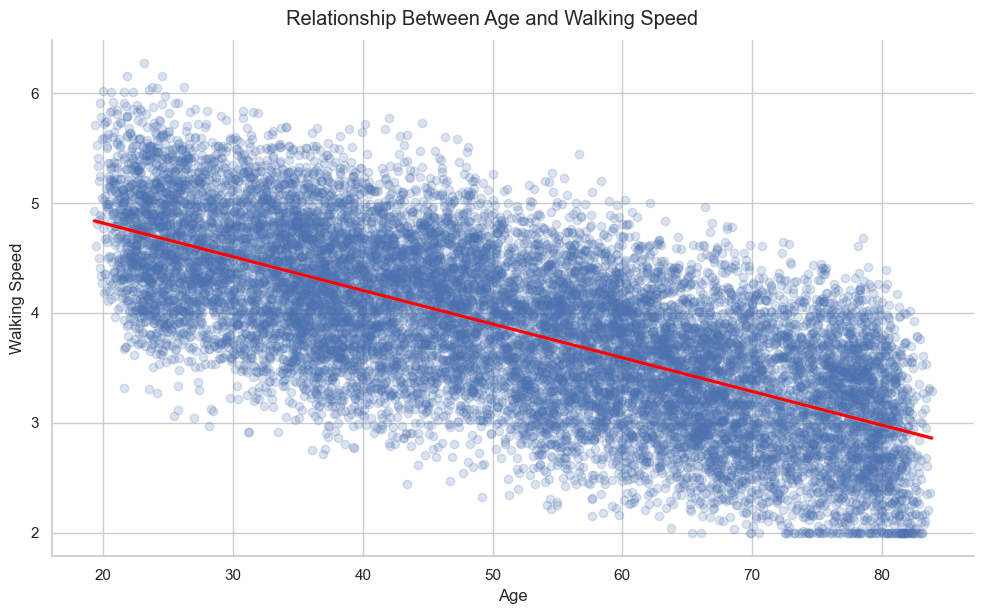

In [40]:
# Set theme
sns.set_theme(style = "whitegrid")

# Scatter plot with regression line
ax1 = sns.lmplot(data = df, 
                  x = 'age', 
                  y = 'walking_speed', 
                  scatter_kws={'alpha': 0.2, 'color': '#4C72B0'},  
                  line_kws={'color': 'red'},
                  height = 6,
                  aspect = 10/6)  

# Add title and axis labels
ax1.fig.suptitle("Relationship Between Age and Walking Speed", y = 1.02)
ax1.set_axis_labels("Age", "Walking Speed")

# Show the plot
plt.show()

# Save figure
ax1.savefig("figure_1", dpi = 300)

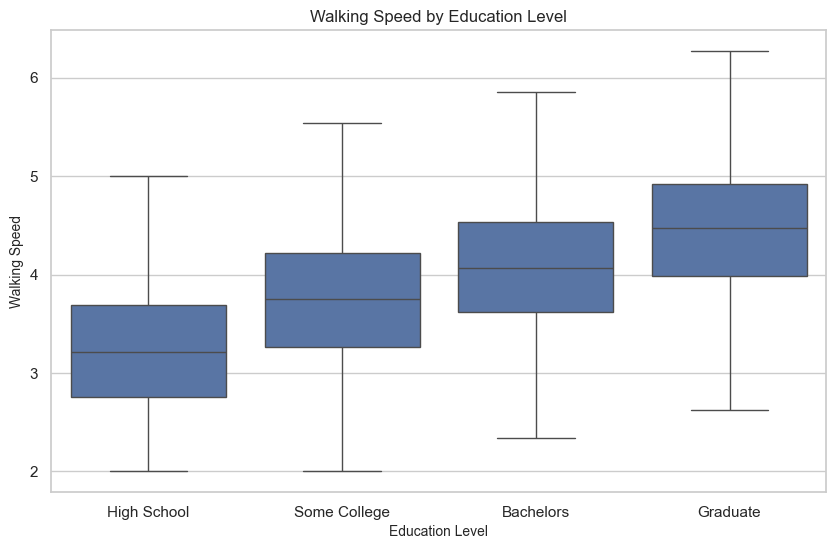

In [41]:
# Set theme
sns.set_theme(style = "whitegrid", rc = {"figure.figsize": (10, 6)})

# Box plots by education level
ax2 = sns.boxplot(data = df, 
                  x = 'education_level', 
                  y = 'walking_speed', 
                  color = '#4C72B0',
                  order = education_order)
                  
# Add title and labels
ax2.set_title("Walking Speed by Education Level", fontsize = 12)
ax2.set_xlabel("Education Level", fontsize = 10)
ax2.set_ylabel("Walking Speed", fontsize = 10)

# Show the plot
plt.show()

# Save figure
fig = ax2.get_figure()
fig.savefig("figure_2.png", dpi = 300)

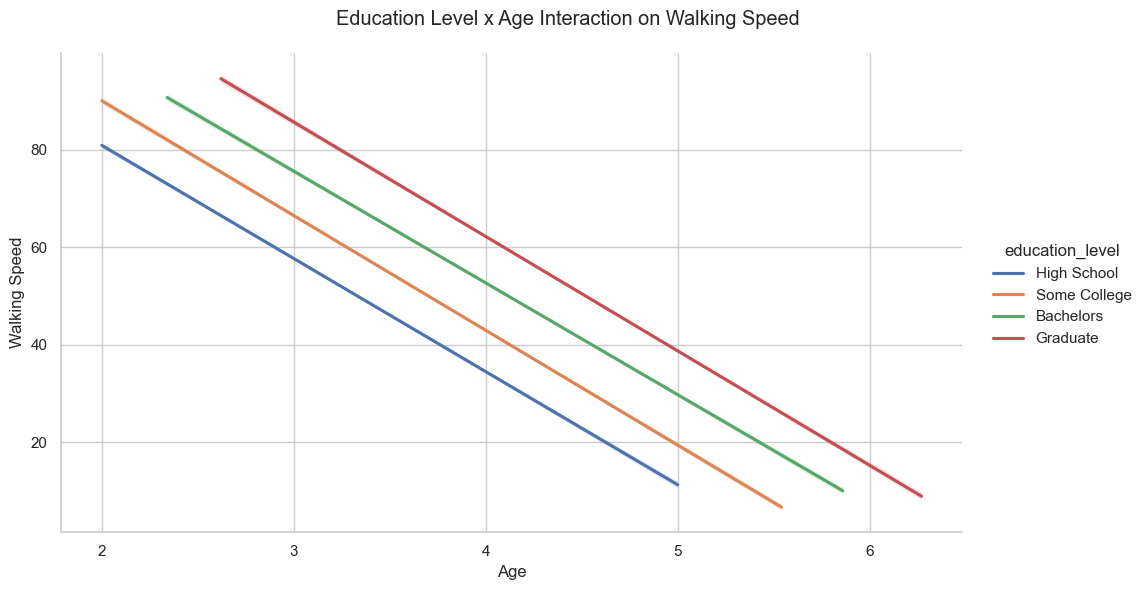

In [42]:
# Line plot showing education age interaction on walking speed
ax3 = sns.lmplot(data = df,
                 x = "walking_speed",
                 y = "age",
                 hue = "education_level",
                 scatter = False,
                 hue_order = education_order,
                 height = 6,
                 aspect = 10/6)

# Add title and labels
ax3.fig.suptitle("Education Level x Age Interaction on Walking Speed")
ax3.set_axis_labels("Age", "Walking Speed")
ax3.tight_layout()

# Show the plot
plt.show()

# Save figure
ax3.savefig("figure_3.png", dpi = 300)

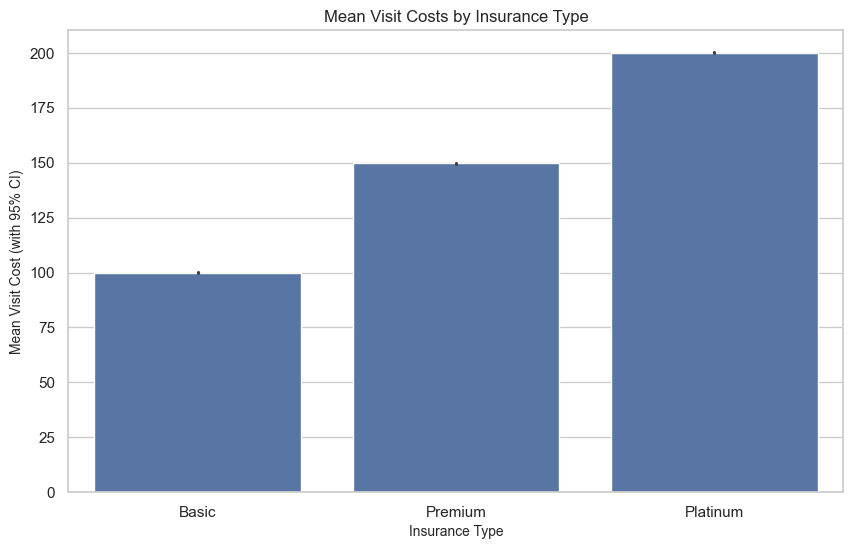

In [43]:
# Bar plot of mean costs by insurance type
# Add error bars or confidence intervals
ax4 = sns.barplot(data = df,
                  x = "insurance_type",
                  y = "visit_cost",
                  errorbar = ('ci', 95),
                  order = insurance_order)

# Add title and labels
ax4.set_title("Mean Visit Costs by Insurance Type", fontsize = 12)
ax4.set_xlabel("Insurance Type", fontsize = 10)
ax4.set_ylabel("Mean Visit Cost (with 95% CI)", fontsize = 10)

# Show the plot
plt.show()

# Save figure
fig = ax4.get_figure()
fig.savefig("figure_4.png", dpi = 300)

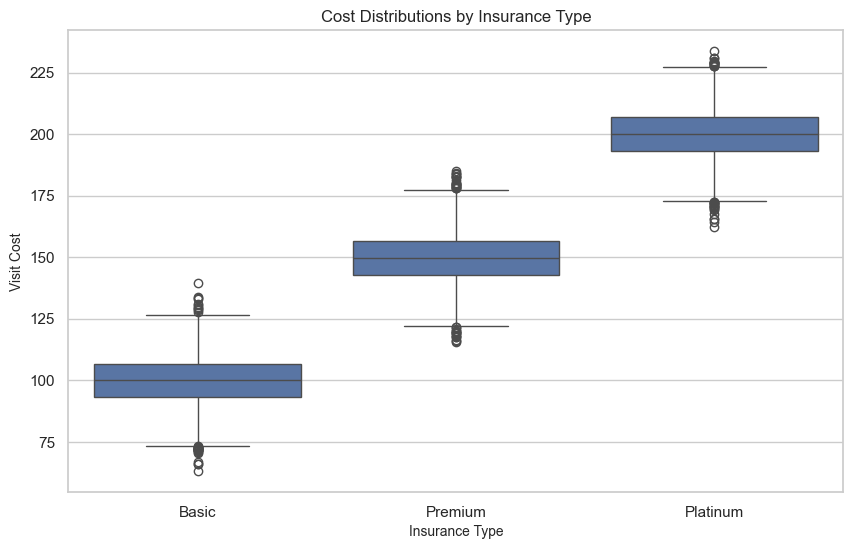

In [44]:
# Box plots showing cost distributions based on insurance types
ax5 = sns.boxplot(data = df,
                  x = "insurance_type",
                  y = "visit_cost",
                  color = '#4C72B0',
                  order = insurance_order)

# Add title and labels
ax5.set_title("Cost Distributions by Insurance Type", fontsize = 12)
ax5.set_xlabel("Insurance Type", fontsize = 10)
ax5.set_ylabel("Visit Cost", fontsize = 10)

# Show the plot
plt.show()

# Save figure
fig = ax5.get_figure()
fig.savefig("figure_5.png", dpi = 300)

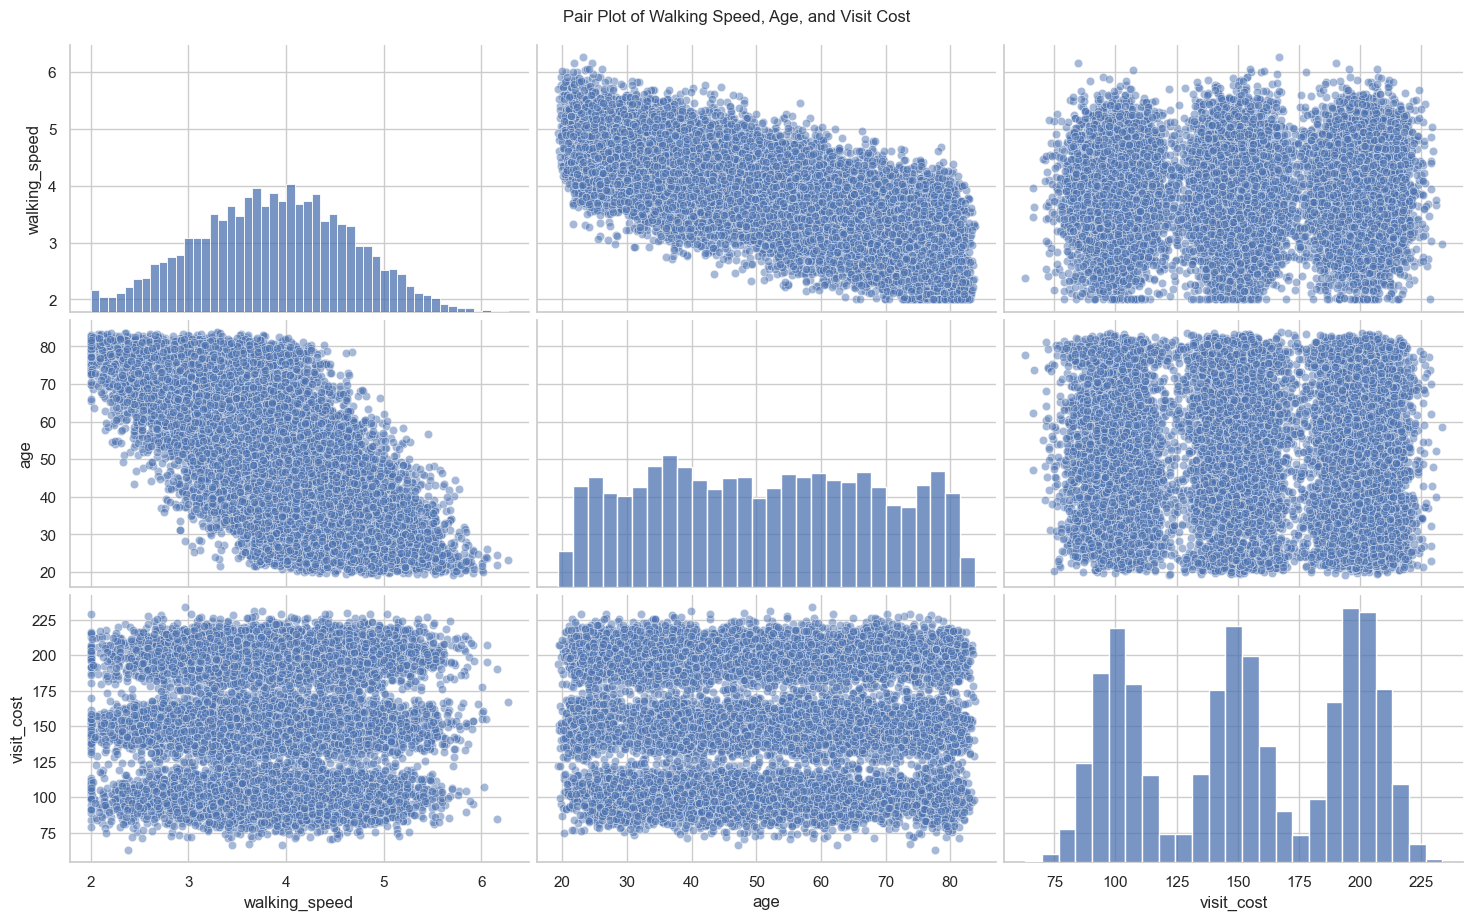

In [45]:
# Pair plot of key numeric variables
ax6 = sns.pairplot(data = df,
                   vars = ['walking_speed', 'age','visit_cost'], 
                   plot_kws = dict(alpha = 0.5),
                   height = 3, 
                   aspect = 5/3)

# Add title to the figure
ax6.fig.suptitle("Pair Plot of Walking Speed, Age, and Visit Cost", y = 1.02, fontsize = 12)

# Show the plot
plt.show()

# Save figure
ax6.savefig("figure_6.png", dpi = 300)

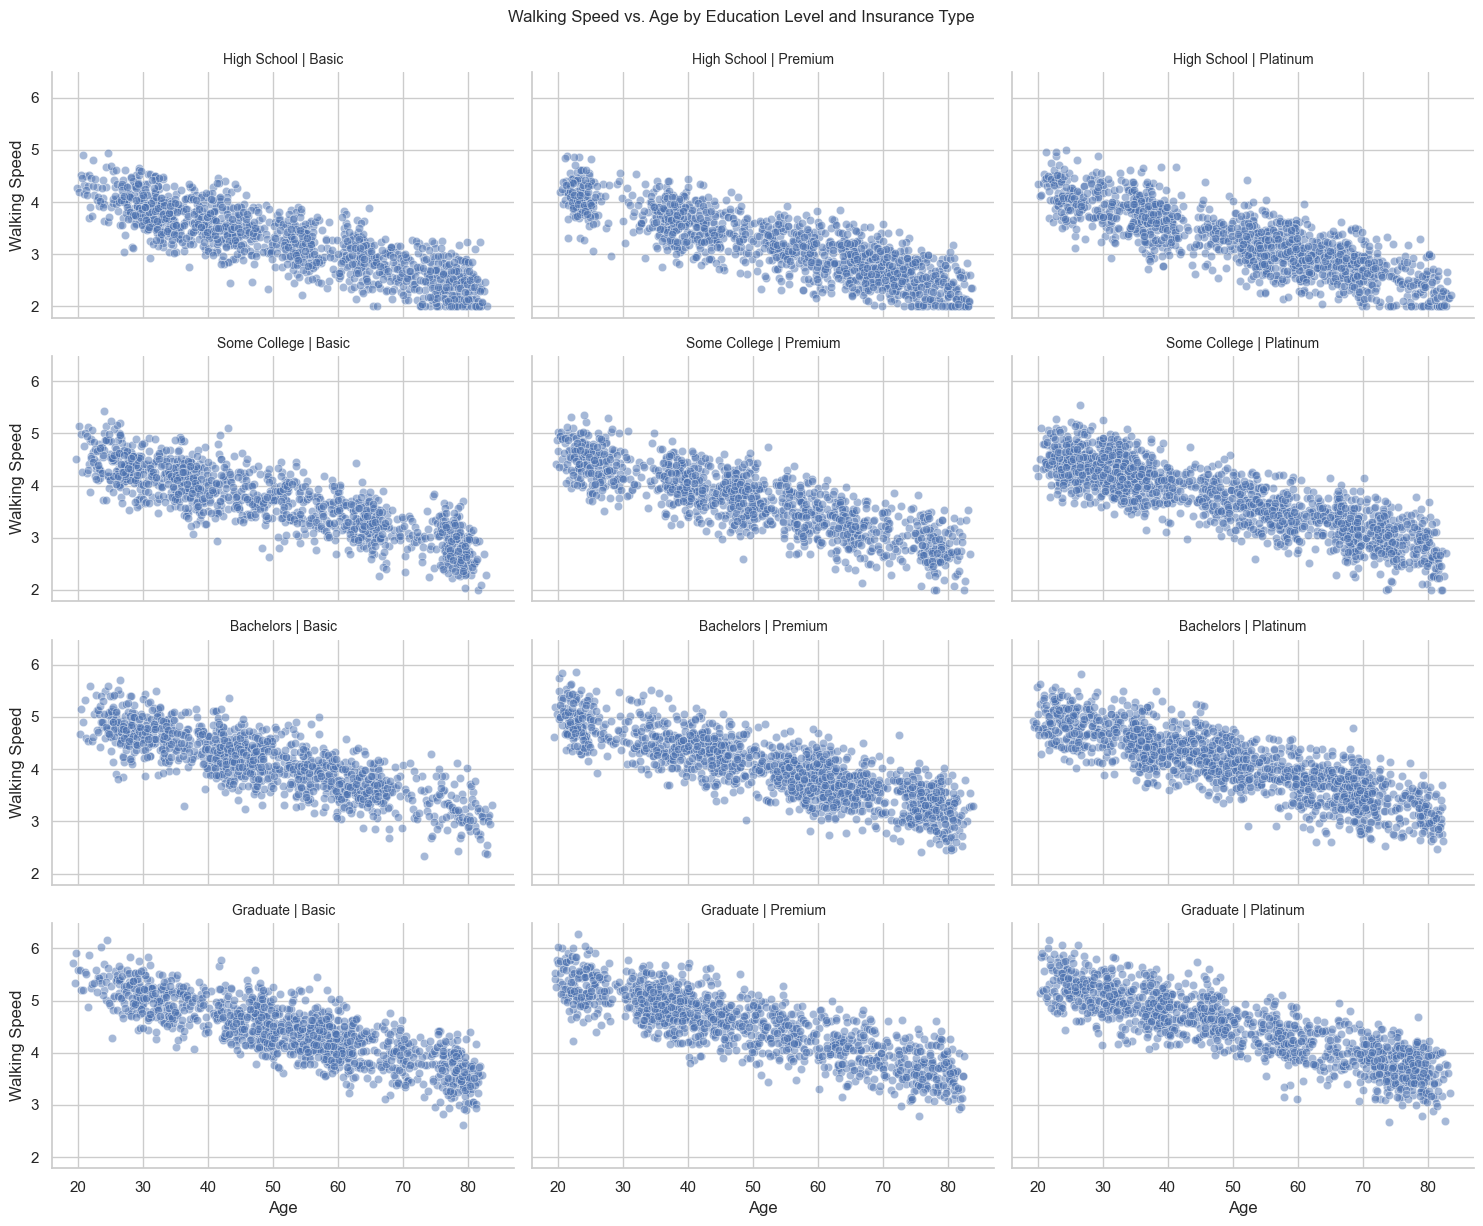

In [46]:
# Faceted walking and age plots by education/insurance
ax7 = sns.FacetGrid(data = df,
                    col = "insurance_type",
                    row = "education_level",
                    col_order = insurance_order,
                    row_order = education_order,
                    height = 3, 
                    aspect = 5/3)

# Add scatter plots to each facet 
ax7.map(sns.scatterplot, "age", "walking_speed", alpha = 0.5)

# Add a global title
ax7.fig.suptitle("Walking Speed vs. Age by Education Level and Insurance Type", y = 1.02, fontsize = 12)

# Set custom titles and axis labels to all subplots
ax7.set_titles("{row_name} | {col_name}", size = 10)
ax7.set_axis_labels("Age", "Walking Speed")

# Show the plot
plt.show()

# Save figure
ax7.savefig("figure_7.png", dpi = 300)

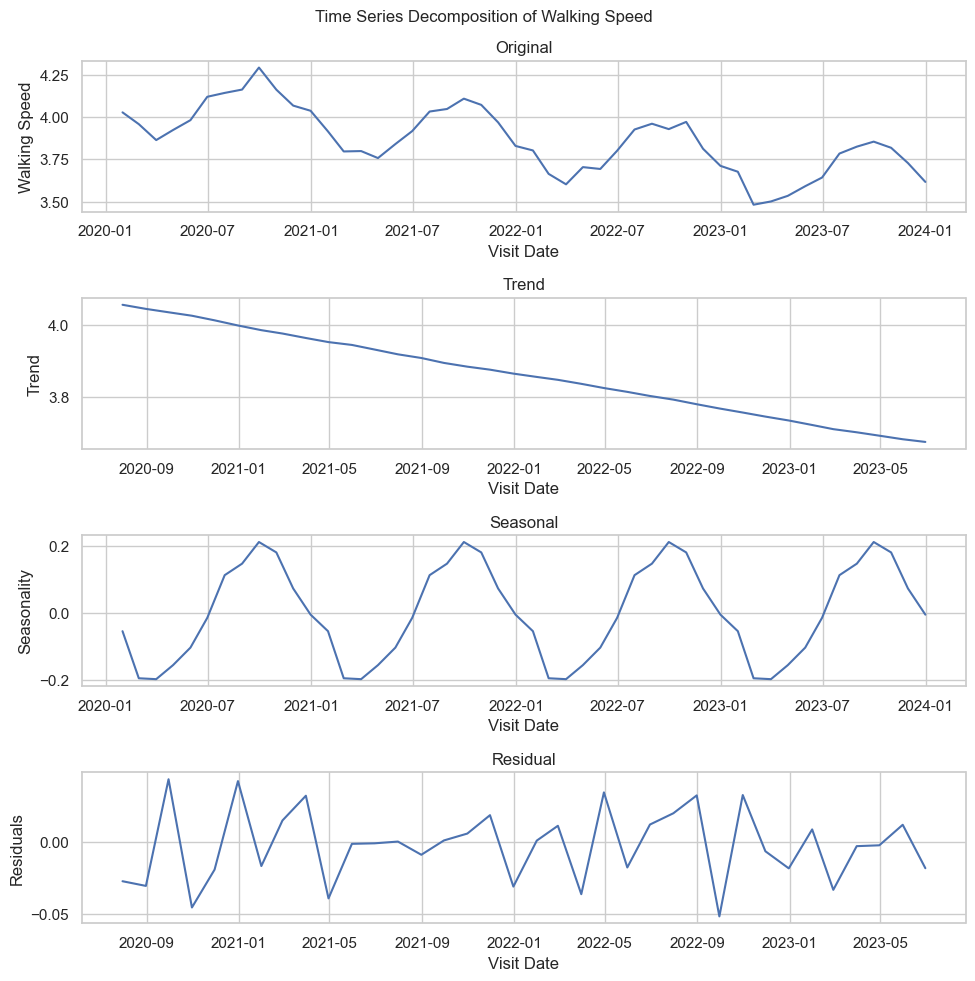

In [47]:
# Time trends 
# Resample visit_dates into monthly manner
time_series = df[["walking_speed", "visit_date"]].set_index('visit_date').resample('ME').mean()

# Decompose the trend by extracting a repeated seasonal pattern over a 12-month period
decomposition = seasonal_decompose(time_series['walking_speed'], model='additive', period = 12)

#  Plot walking speed time series 
ax8, axes = plt.subplots(4, 1, figsize = (10, 10))

sns.lineplot(data = time_series['walking_speed'], ax = axes[0]).set_title('Original')
sns.lineplot(data = decomposition.trend, ax = axes[1]).set_title('Trend')
sns.lineplot(data = decomposition.seasonal, ax = axes[2]).set_title('Seasonal')
sns.lineplot(data = decomposition.resid, ax = axes[3]).set_title('Residual')

# Add global title and adjust layout
ax8.suptitle("Time Series Decomposition of Walking Speed", fontsize = 12)
plt.tight_layout()

# Add labels
axes[0].set_ylabel("Walking Speed")
axes[0].set_xlabel("Visit Date")
axes[1].set_ylabel("Trend")
axes[1].set_xlabel("Visit Date")
axes[2].set_ylabel("Seasonality")
axes[2].set_xlabel("Visit Date")
axes[3].set_ylabel("Residuals")
axes[3].set_xlabel("Visit Date")

# Show the plot
plt.show()

# Save figure
ax8.savefig("figure_8.png", dpi = 300)

In [48]:
# Save summary to README.md file
with open("README.md", "a") as file:
    file.write("\n")
    print(f"## **Question 4**", file = file)
    print(f"**Walking speed vs. age plot:**\n", file = file)
    print(f"![Figure 1](figure_1.png)\n",file = file)
    print(f"**Walking speed vs. education level plot:**\n", file = file)
    print(f"![Figure 2](figure_2.png)\n",file = file)
    print(f"**Walking speed vs. age and education level interaction plot:**\n", file = file)
    print(f"![Figure 3](figure_3.png)\n",file = file)
    print(f"**Mean visit costs vs. insurance type plot:**\n", file = file)
    print(f"![Figure 4](figure_4.png)\n",file = file)
    print(f"**Cost distributions vs. insurance type plot:**\n", file = file)
    print(f"![Figure 5](figure_5.png)\n",file = file)
    print(f"**Walking speed, age, and visit cost pair plots:**\n", file = file)
    print(f"![Figure 6](figure_6.png)\n",file = file)
    print(f"**Walking Speed vs. Age faceted plots (by education level and insurance types):**\n", file = file)
    print(f"![Figure 7](figure_7.png)\n",file = file)
    print(f"**Walking speed trend over time (Decomposition) plots:**\n", file = file)
    print(f"![Figure 8](figure_8.png)\n", file = file)